In [34]:
#导入线性模型和多项式特征构造模块
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams['font.sans-serif'] = ["SimHei"]
plt.rcParams["axes.unicode_minus"] = False

In [35]:
data = pd.read_csv('temperature.csv', header=None)

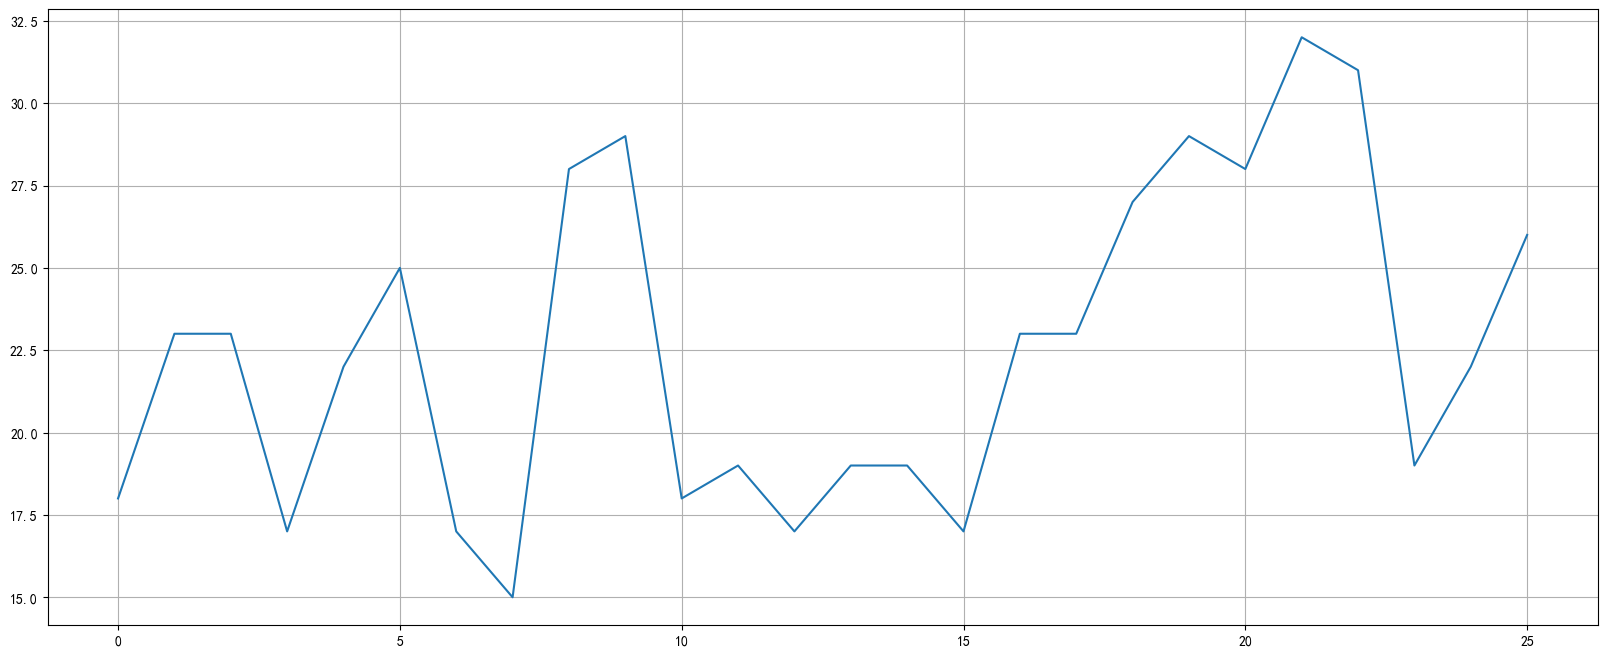

In [36]:
# 沈阳26天的日最高气温
data.T.max().plot(figsize=(20, 8))
plt.grid(True)
plt.show()

In [37]:
# 随机划分训练集和测试集
test_inx = data.T.max().sample(4).index.to_list()
test_v = data.loc[test_inx, :].T.max().to_list()
train_inx = [i for i in data.index.to_list() if i not in test_inx]
train_v = data.loc[train_inx, :].T.max().to_list()

In [38]:
xTrain = np.array(train_inx)[:, np.newaxis]      # 训练数据（日期）
yTrain = np.array(train_v)                   # 训练数据（最高气温）
xTest = np.array(test_inx)[:, np.newaxis]      # 测试数据（日期）
yTest = np.array(test_v)                    # 测试数据（最高气温）

In [39]:
plotData = np.array(np.linspace(0, data.shape[0], data.shape[0]*2))[:, np.newaxis]

In [40]:
def initPlot():
    plt.figure(figsize=(20, 8))
    plt.title('2020年4月沈阳天气', fontsize=20)
    plt.xlabel('日期', fontsize=17)
    plt.ylabel('当日最高气温', fontsize=17)
    plt.grid(True) 
    return plt

In [41]:
# 一阶线性拟合

# 线性拟合
linearModel = LinearRegression()
linearModel.fit(xTrain, yTrain)
linearModelTrainResult = linearModel.predict(plotData)
 
# 计算R方
linearModelRSquare = linearModel.score(xTest, yTest)
 
print("线性拟合R方:", linearModelRSquare) 

线性拟合R方: 0.18066857475380593


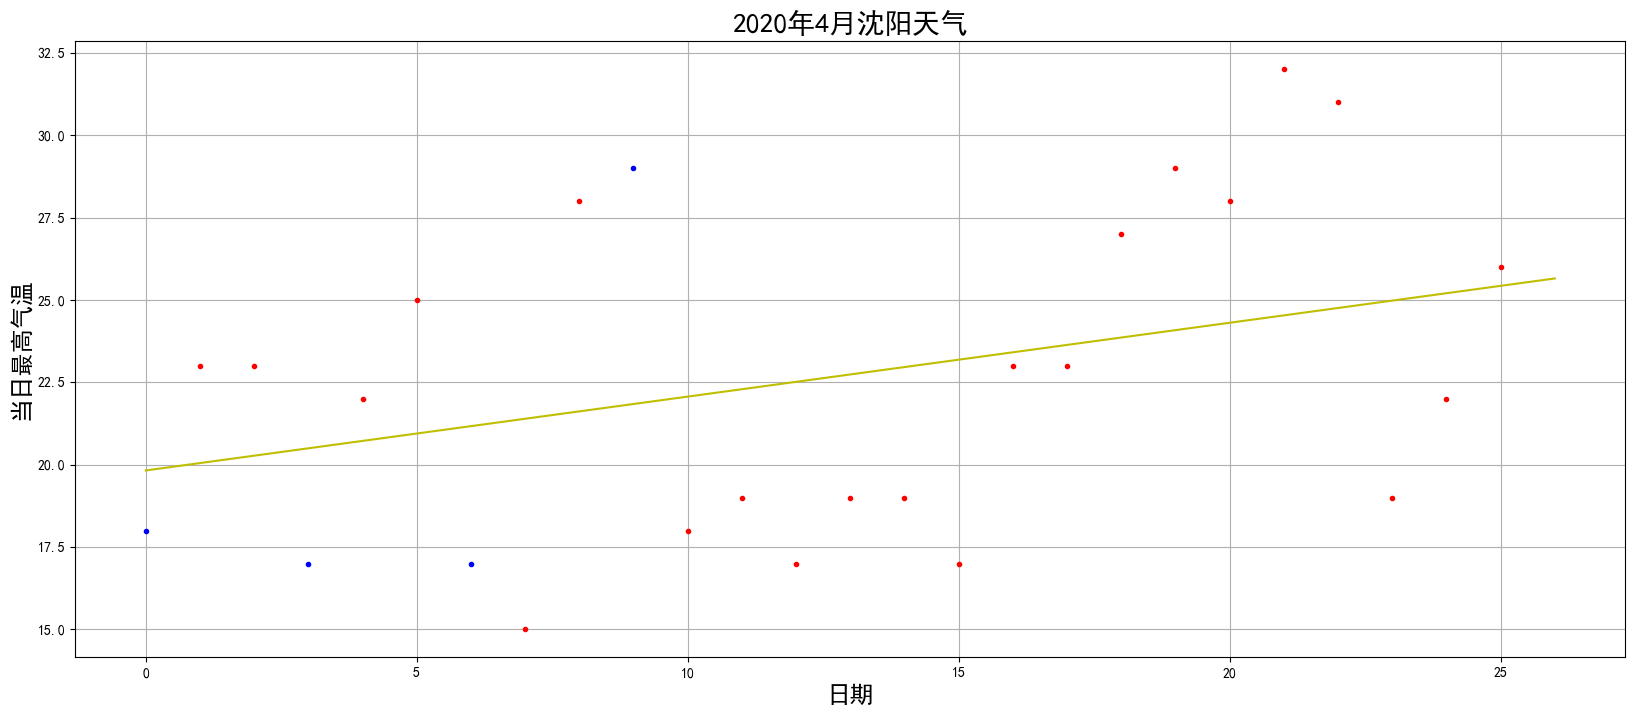

In [42]:
plt = initPlot()
plt.plot(xTrain, yTrain, 'r.')          # 训练点数据(红色)
plt.plot(xTest, yTest, 'b.')            # 测试点数据(蓝色)
plt.plot(plotData, linearModelTrainResult, 'y-')           # 线性拟合线
plt.show()

In [43]:
# 二阶线性拟合

quadratic_featurizer = PolynomialFeatures(degree=2)
xTrain_quadratic = quadratic_featurizer.fit_transform(xTrain)
quadraticModel = LinearRegression()
quadraticModel.fit(xTrain_quadratic, yTrain)
 
# 计算R方(针对测试数据)
xTest_quadratic = quadratic_featurizer.fit_transform(xTest)
quadraticModelRSquare = quadraticModel.score(xTest_quadratic, yTest)
print("二阶拟合R方:", quadraticModelRSquare)
 
# 绘图点也同样需要进行高阶扩充以便使用曲线进行拟合
plotData_quadratic = quadratic_featurizer.fit_transform(plotData)
quadraticModelTrainResult = quadraticModel.predict(plotData_quadratic)

二阶拟合R方: -0.34074987624670183


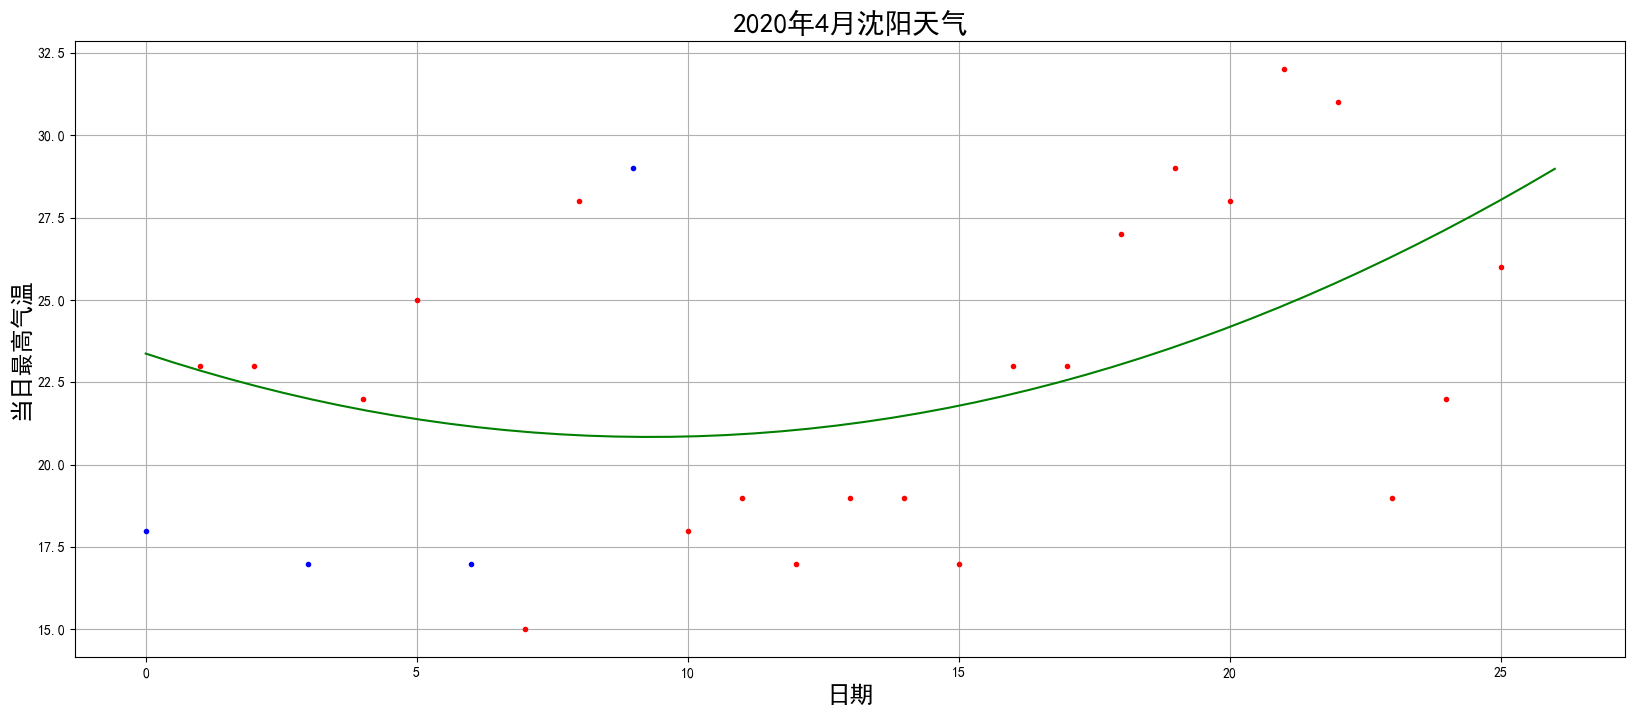

In [44]:
plt = initPlot()
plt.plot(xTrain, yTrain, 'r.')          # 训练点数据(红色)
plt.plot(xTest, yTest, 'b.')            # 测试点数据(蓝色)
plt.plot(plotData, quadraticModelTrainResult, 'g-')        # 二阶拟合线
plt.show()

In [46]:
# 三阶线性拟合

cubic_featurizer = PolynomialFeatures(degree=3)
xTrain_cubic = cubic_featurizer.fit_transform(xTrain)
cubicModel = LinearRegression()
cubicModel.fit(xTrain_cubic, yTrain)

plotData_cubic = cubic_featurizer.fit_transform(plotData)
cubicModelTrainResult = cubicModel.predict(plotData_cubic)

三阶拟合R方: -1.2918241231325172


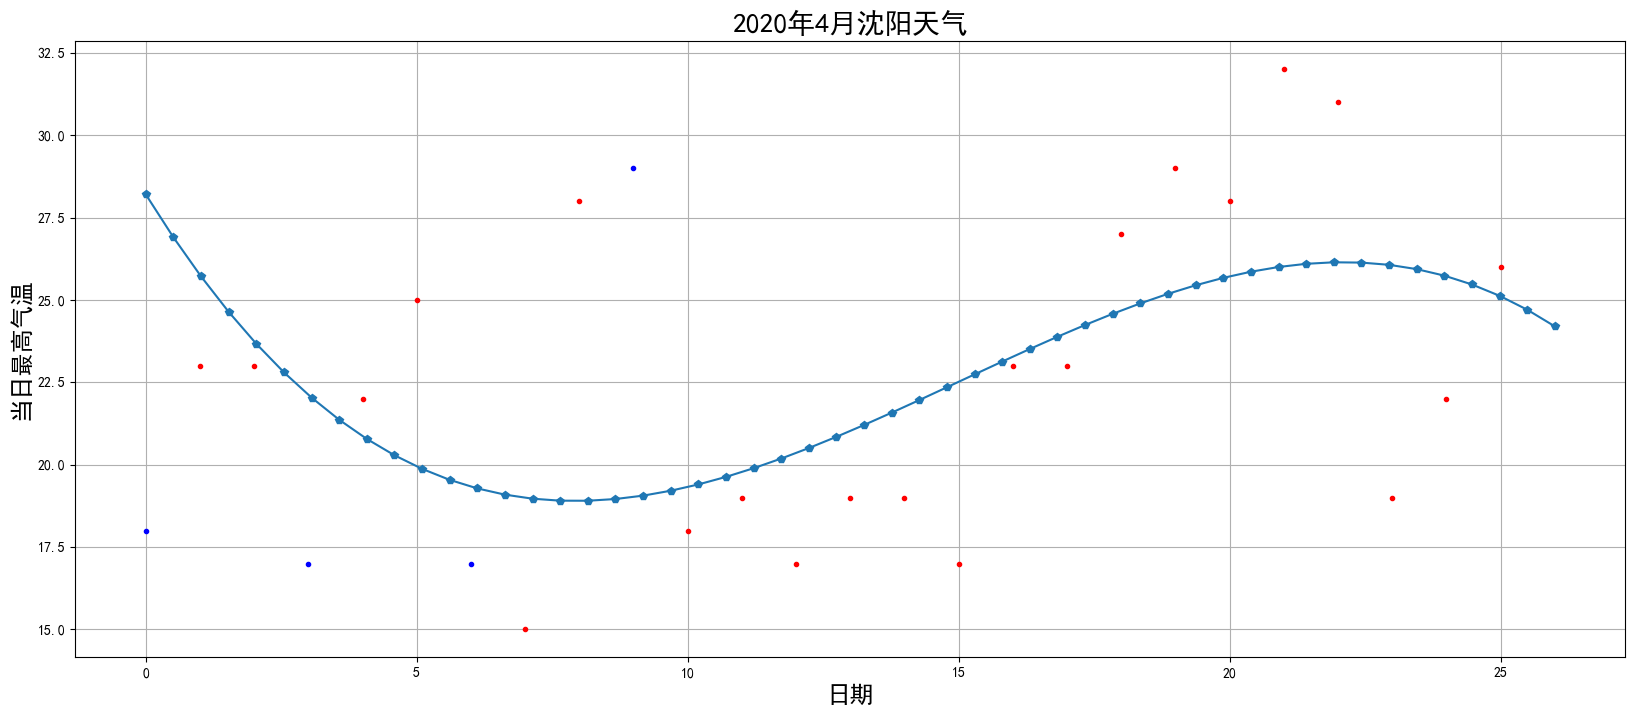

In [47]:
# 计算R方(针对测试数据)
xTest_cubic = cubic_featurizer.fit_transform(xTest)
cubicModelRSquare =  cubicModel.score(xTest_cubic, yTest)
print("三阶拟合R方:", cubicModelRSquare)
 
plt = initPlot()
plt.plot(xTrain, yTrain, 'r.')          # 训练点数据(红色)
plt.plot(xTest, yTest, 'b.')            # 测试点数据(蓝色)
plt.plot(plotData, cubicModelTrainResult, 'p-')            # 三阶拟合线
plt.show()

In [48]:
# 四阶线性拟合

fourth_featurizer = PolynomialFeatures(degree=4)
xTrain_fourth = fourth_featurizer.fit_transform(xTrain)
fourthModel = LinearRegression()
fourthModel.fit(xTrain_fourth, yTrain)

plotData_fourth = fourth_featurizer.fit_transform(plotData)
fourthModelTrainResult = fourthModel.predict(plotData_fourth)

In [49]:
# 计算R方(针对测试数据)
xTest_fourth = fourth_featurizer.fit_transform(xTest)
fourthModelRSquare =  fourthModel.score(xTest_fourth, yTest)
print("四阶拟合R方:", fourthModelRSquare)

四阶拟合R方: -0.6881733542844639


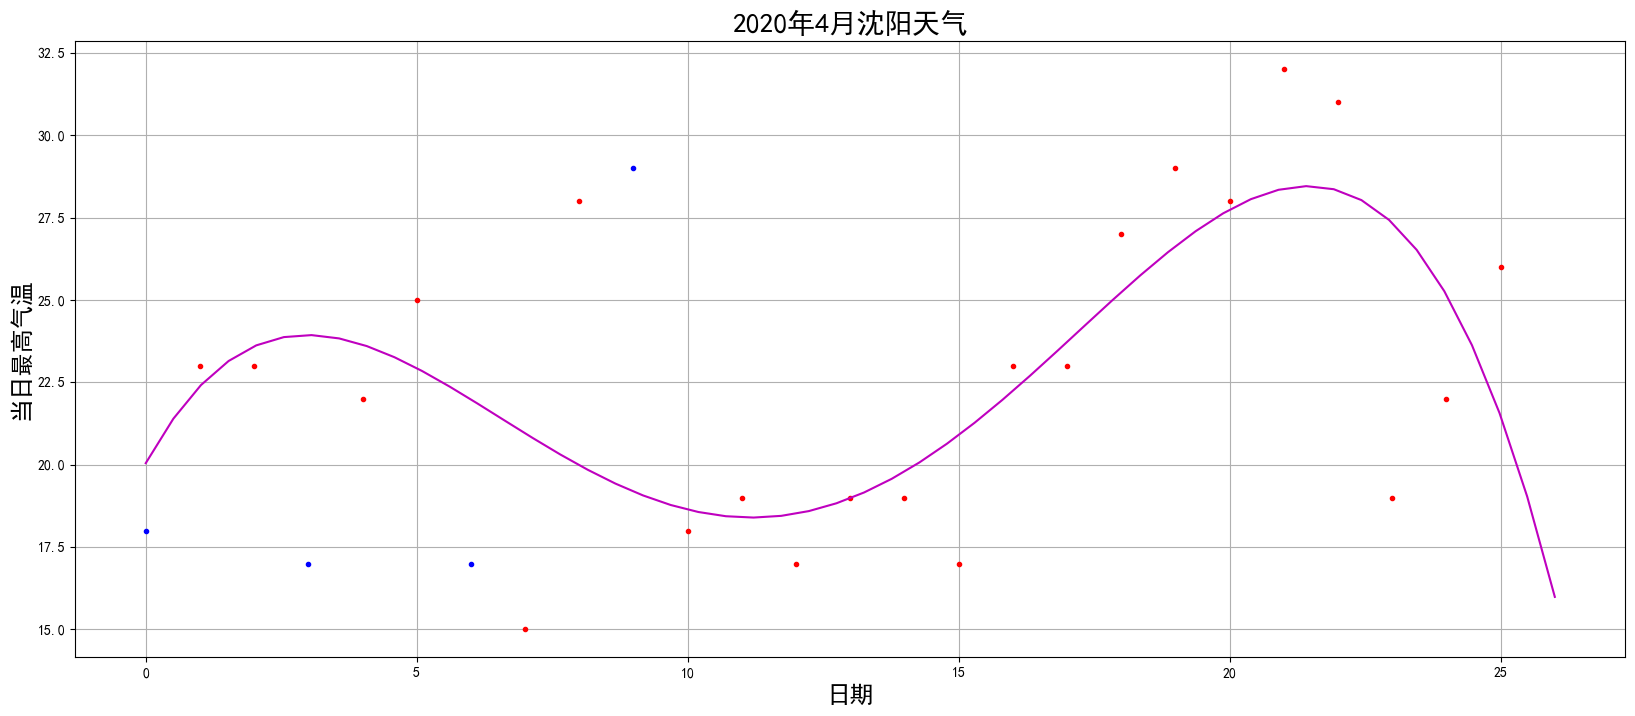

In [50]:
plt = initPlot()
plt.plot(xTrain, yTrain, 'r.')          # 训练点数据(红色)
plt.plot(xTest, yTest, 'b.')            # 测试点数据(蓝色)
plt.plot(plotData, fourthModelTrainResult, 'm-')            # 四阶拟合线
plt.show()

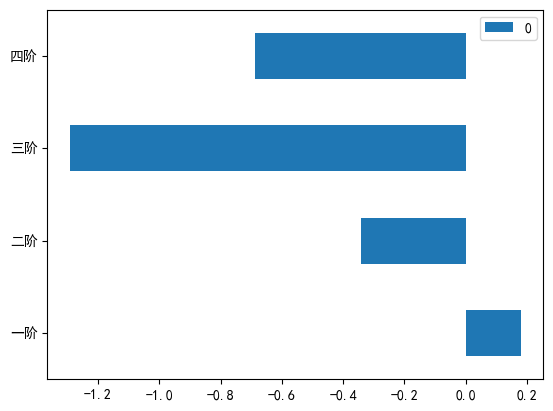

In [51]:
# 误差分析

pd.DataFrame([linearModelRSquare, quadraticModelRSquare, cubicModelRSquare, fourthModelRSquare], index=["一阶", "二阶", "三阶", "四阶"]).plot(kind='barh')
plt.show()

In [ ]:
# 显然，得到的拟合R方值并不是随着阶数的增高而增大，说明日期并不是最高气温的影响因素。这正与我们常识所知的结论相吻合。